# 1. Рассчитайте метрики TF-IDF для любых 10 песен на одном языке, которые вы сами выберите.
Не забудьте, что нужно привести слова к начальной форме, убрать
стоп-слова.


## 1.1 извлечение массива с названием песен с собственного репозитория github

In [25]:
# текстовые файлы с текстом десяти песен лежат в репозитории на github
# сначала импортируем эти песни.
import requests   # для работы с запросом с репозитория

# адресс, где находятся 10 песен с текстом
url = 'https://github.com/KolyaDavydov/HomeWork_Innopolis/blob/develop/HW_13/data/'

# Получаем по запросу ответ и переводим его в строку:
response = requests.get(url)
text = response.text

#Распарсим строку и получим список названий файлов песен
import re # Для работы с регулярными выражениями
# text
# Регулярное выражение для поиска подстроки между 'HW_13/data/' и '","contentType":"file"'
pattern = r"(?<=HW_13/data/)(.*?)(?=\",\"contentType\":\"file\")"

# Поиск всех подстрок (всех названий песен)
song_names = re.findall(pattern, text)

song_names

['ddt.txt',
 'kino.txt',
 'kipelov.txt',
 'kish.txt',
 'leps.txt',
 'lyube.txt',
 'maksim.txt',
 'sector_gasa.txt',
 'zhuki.txt',
 'zveri.txt']

## 1.2 извлечение текстов песен

In [26]:
# создаем пустой список в котором будут храниться url адресса песен
song_adresses = []

# ссылка к папке с песнями, которые должны быть в формате raw, что бы их можно было извлечь
url_raw = 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/'

for song in song_names:
  # print(type(song))
  song_raw_adress = url_raw + song
  song_adresses.append(song_raw_adress)

song_adresses

['https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/ddt.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/kino.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/kipelov.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/kish.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/leps.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/lyube.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/maksim.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/sector_gasa.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/zhuki.txt',
 'https://raw.githubusercontent.com/KolyaDavydov/HomeWork_Innopolis/develop/HW_13/data/zveri.txt']

In [27]:
# извлекаем тексты песен в один список из 10 элементов, заменив символы перевода строки на пробелы
song_texts = []

for song in song_adresses:
  response = requests.get(song)
  text = response.text
  song_texts.append(text.replace('\n', ' '))

song_texts

['Что такое осень? Это небо. Плачущее небо под ногами. В лужах разлетаются птицы с облаками Осень я давно с тобою не был. В лужах разлетаются птицы с облаками Осень я давно с тобою не был.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная даль.  Что такое осень? Это камни Верность над чернеющей Невою Осень вновь напомнила душе о самом главном Осень я опять лишен покоя. Осень вновь напомнила душе о самом главном Осень я опять лишен покоя.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная даль.  Что такое осень? Это ветер Вновь играет рваными цепями Осень доползем ли, долетим ли до ответа Что же будет с родиной и с нами. Осень доползем ли, долетим ли до рассвета Что же будет завтра с нами.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная даль.  Осень в небе, жгут корабли Осень мне бы, прочь от земли Там, где в море тонет печаль Осень темная д

## 1.3 Предобработка текста перед расчетом метрик TF-IDF
Для предобработки используется библиотека NLTK:

NLTK - пакет библиотек и программ для
символьной и статистической обработки
естественного языка, написанных на языке
программирования Python. Содержит
графические представления и примеры
данных.

In [28]:
import nltk

### 1.3.1 Токенизация и приведение к нижнему регистру (функция)
разобъем каждый документ(песню на слова - массив слов, где все в нижнем регистре и нет знаков препинания)


In [29]:


# для токенизации
# # разбивает строку на слова, но остаются знаки припинания
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize
# можно разбить строку с использованием регуляного выражения (удалим вссе знаки препинания потом)
from nltk.tokenize import RegexpTokenizer

# TOKEНИЗАЦИЯ функция принимает строку и возвращает массив слов после токенизации и перевода к нижнему регистру
tokenizer = RegexpTokenizer(r'\w+') # для не включения знаков препиания
def tokenization (stroka):
  return tokenizer.tokenize(stroka.lower())


### 1.3.2 Удаление стоп-слов (функция)
удаляем из текстов все стоп слова

In [30]:
# Для удаления стоп-слов
nltk.download('stopwords')
from nltk.corpus import stopwords

# УДАЛЕНИЕ СТОП-СЛОВ
# создаем массив стоп слов
stop_words = set(stopwords.words('russian'))
# Удаление стоп-слов массив слов и возвращает массив слов не содержащих стоп-слов
def del_stopwords (stroka):
  return [word for word in stroka if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1.3.3 лематизация (функция)
приводим все слова к нормальныой форме

In [31]:
#Для лематизации
# # для английского языка
# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer
# для русского в том числе
! pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

#ЛЕМАТИЗАЦИЯ
# # работает для английского языка
# lemmatizer = WordNetLemmatizer()
# def lema(stroka):
#   return [lemmatizer.lemmatize(word) for word in stroka]
# для русского
def lema(stroka):
  return [morph.parse(word)[0].normal_form for word in stroka]

### 1.3.4 Итоговая функция которая принимает список строк(документов) и возвращает список списков слов после их нормализации

In [32]:
# Принимает не обработанный список строк (документов)
# возвращает нормализованный список списков слов
def normal_list(list_of_texts):
  song_texts_token = []
  for i in list_of_texts:
    song_texts_token.append(tokenization(i))

  for i in range(len(song_texts_token)):
    song_texts_token[i] = del_stopwords (song_texts_token[i])
    song_texts_token[i] = lema (song_texts_token[i])

  return song_texts_token

after = normal_list(song_texts)


In [33]:
# Принимает список списков слов
# возвращает список строк после объединения слов в рамках одного списка
def join_to_str (list_words):
  documents = []
  for i in list_words:
    documents.append(' '.join(i))
  return documents

documents = join_to_str(after)

# Выведем список документов
documents

['такой осень это небо плачущий небо нога лужа разлетаться птица облако осень давно ты лужа разлетаться птица облако осень давно ты осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль такой осень это камень верность чернеть нева осень вновь напомнить душа сам главный осень лишить покой осень вновь напомнить душа сам главный осень лишить покой осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль такой осень это ветер вновь играть рваный цепь осень доползти долететь ответ родина мы осень доползти долететь рассвет завтра мы осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль осень небо жечь корабль осень прочь земля море тонуть печаль осень тёмный даль таять стая город мгла осень знать ты сколько рваться листва осень вечно право',
 'белый снег серый лёд растрескаться земля одеяло лоскутный город дорожный петля город плыть облако закрывать небесный свет город жёлтый дым город два тысяча год прожить свет звезда 

## 1.4 Реализация непосредственных метрик TF-IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# иннициализируем TfidfVectorizer
vectorizer = TfidfVectorizer()

# Вычисляем TF-IDF для каждого документа в коллекции
tfidf_matrix = vectorizer.fit_transform(documents)

# Результат - это матрица TF-IDF, где строки соответствуют документам, а столбцы - словам
print(tfidf_matrix.toarray())


[[0.         0.         0.         ... 0.07532979 0.         0.        ]
 [0.         0.         0.         ... 0.06778615 0.         0.        ]
 [0.         0.09667036 0.09667036 ... 0.0359483  0.         0.        ]
 ...
 [0.04122982 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.24954567]]


# 2. Цель этого задания - использовать предварительно обученную модель BERT для классификации тональности отзывов на фильмы.

## 2.1 - Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную метку тональности (положительный/отрицательный)

ссылка: https://drive.google.com/file/d/1RZJzx3nQlgmxKG-l3p7KldWBl_HVW3N9/view


In [35]:
# Для начала скачаем данный датасет и на всякий случай загрузим его на свой гугл диск и сделаем этот файл доступным для всех у кого есть ссылка
# Так выглядит ссылка для скачивания: https://drive.google.com/file/d/1GU_KsWn78h1K7Ag_xwZkwbJ6R_kI_mqf/view?usp=drive_link

# Затем созлалим переменную 'url' которую прировняем с 'https://drive.google.com/uc?id=' + '1GU_KsWn78h1K7Ag_xwZkwbJ6R_kI_mqf' (это так называемый id)

url='https://drive.google.com/uc?id=1GU_KsWn78h1K7Ag_xwZkwbJ6R_kI_mqf'

# импортируем pandas и загружаем датасет в формате CSV в DataFrame
import pandas as pd

data = pd.read_csv(url)
data = data[0:5000].copy()
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [36]:
# DataFrame сосстоит из 50_000 записей, где два столбца: review-отзывы и sentiment-либо полижительный либо отрицательный.
# Проверим что датасет заполнен на всех столбцах:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     5000 non-null   object
 1   sentiment  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [37]:
# поскольку всякие машшиные алгоритмы любят работать с цифрами переделаем столбец 'sentiment' в числа, где 1-possitive, 2-negative

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.sentiment = le.fit_transform(data.sentiment)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## 2.2 - Подготовка данных

In [38]:
# разделим датафрейм на тестовую и тренировочную модель в соотношению 80/20
# с использованием библиотеки 'train_test_split' модуля sklearn
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data.review,
                                                     data.sentiment,
                                                     test_size=0.2,
                                                     random_state=20,
                                                     shuffle=True)

In [39]:
import re # для работы с регулярными выражениями
from bs4 import BeautifulSoup # в основном для парсинга html страниц

# Функция принимающая строку и удаляющая ненужные симсолы и слова
def text_preprocessing(text):
  text = re.sub(r'\s+', ' ', text).strip() # меняем \n \t на пробелы и strip удаляет пробелы в начале и в конце строки
  text = BeautifulSoup(text, "lxml").text
  text = text.replace('<br />', '')

  return text

# сравнение строк до парсинга и после
print('До парсинга: ', data.review.values[1])
print('После парсинга: ', text_preprocessing(data.review.values[1]))


До парсинга:  A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribl

In [40]:
# Проверим длину строки самого длинного комментария в тренировочной выборке
len(max(train_x, key=len))

9951

In [41]:
# Затем применим функцию преподготовки к тестовой и тренировочной выборке:
train_x = train_x.apply(text_preprocessing)
test_x = test_x.apply(text_preprocessing)

# и любопытсва ради посмотри сколько стала длина самого длинного коментария
len(max(train_x, key=len))

<ipython-input-39-fec119d3304d>:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


9783

Text(0.5, 0, 'длина комментария')

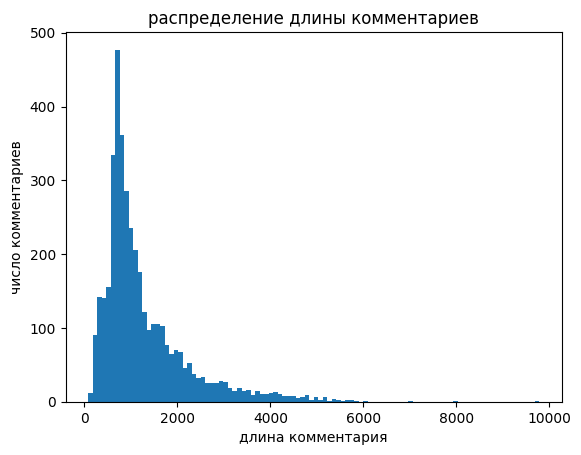

In [42]:
# Визуализируем распределение длин строк в коментариях в тренировочной выборке
import matplotlib.pyplot as plt

len_comment = []
for t in train_x:
  len_comment.append(len(t))

plt.figure()
plt.hist(len_comment, bins=100);
plt.title('распределение длины комментариев')
plt.ylabel('число комментариев')
plt.xlabel('длина комментария')

# можно сделать вывод что после предобработки наибольшее количество комментариев с длиной 800-10000 символов

## 2.3 - Загрузка и предварительно обученной модели BERT

Подготовьте данные: используйте токенизатор BERT для преобразования
текстовых данных в формат, который можно подать на вход модели BERT

In [43]:
import torch

In [44]:
# интересную информацию можно найти здесь https://habr.com/ru/articles/704592/
# импортируем 'transformers' с помощью которого можно исопльзовать и работать с готовыми моделями находящаяся на платформе Higging Face
!pip install transformers

In [45]:
from transformers import BertTokenizer

# Загружаем BERT(без корпуса) — это модель трансформеров, предварительно обученная на большом корпусе данных
# на английском языке в самоконтролируемой манере.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# Функция которая будет преподготоавливать текст перед подачей его в модель
def preprocessing_for_bert(data):
  # Создадим пока пустые списки для записи выходных данных после BertTokenizer
  input_ids = []
  attention_masks = []

  # проходимся по каждому отзыву и применяем метод encodin_plus
  for sent in data:
    # метод encode_plus:
      # добавляет [CLS] и [SEP] токены в начале и в конце предложения
      # усекает или допоняет(пустотами) предложения до максимальной длины (pad_to_max_length)
      # сопоставляет токены с их идентификаторами
      # возвращет выходные данные (идентификаторы слов и маска)
    encoded_sent = tokenizer.encode_plus(text = text_preprocessing(sent),
                                         add_special_tokens=True,
                                         max_length = MAX_LEN,
                                         pad_to_max_length=True,
                                         passreturn_attention_mask = True)
    input_ids.append(encoded_sent.get('input_ids'))
    attention_masks.append(encoded_sent.get('attention_mask'))

  # переделываем полученные данные в тензоры
  input_ids = torch.tensor(input_ids)
  attention_masks = torch.tensor(attention_masks)

  return input_ids, attention_masks

# и эти данные содержащие input_ids и attention_masks уже можно подать на модель BERT

In [46]:
import numpy as np
# объеденим наши тестовые и тренировочные данные
all_reviews = np.concatenate([train_x.values, test_x.values])

# перекодируем наши тестовые и тренировоные данные
encoded_reviews = [tokenizer.encode(sent, add_special_tokens=True) for sent in all_reviews]

# Найдем максимальную длину обзора
max_len = max([len(sent) for sent in encoded_reviews])
print('максимальная длина: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (560 > 512). Running this sequence through the model will result in indexing errors


максимальная длина:  2181


In [47]:
# что б не перегружать вычисления установим максимальную длинну = 100
MAX_LEN = 100

print('Tokenizing data...')
train_inputs, train_masks = preprocessing_for_bert(train_x)
test_inputs, test_masks = preprocessing_for_bert(test_x)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2622: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passretur

Tokenizing data...


Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'passreturn_attention_mask': True} not recognized.
Keyword arguments {'

In [48]:
#посмтотрим длину обзора номер 2 в тренировочной выборке (количество слов)
len(train_x[2].split(' '))

162

In [49]:
# можно увидеть как выглядит после токенизации данные одного обзора
tokenizer.encode_plus(
            text = text_preprocessing(train_x[2]),
            add_special_tokens=True,
            max_length=MAX_LEN,
            pad_to_max_length=True,
            return_tensors='pt',
            return_attention_mask=True
            )

{'input_ids': tensor([[  101,  1045,  2245,  2023,  2001,  1037,  6919,  2126,  2000,  5247,
          2051,  2006,  1037,  2205,  2980,  2621,  5353,  1010,  3564,  1999,
          1996,  2250, 22442,  4258,  1998,  3666,  1037,  2422,  1011, 18627,
          4038,  1012,  1996,  5436,  2003, 21934, 24759,  6553,  1010,  2021,
          1996,  7982,  2003, 25591,  1998,  1996,  3494,  2024,  5622,  2912,
          3468,  1006,  2130,  1996,  2092,  7852,  6878,  7642,  6359,  1007,
          1012,  2096,  2070,  2089,  2022,  9364,  2043,  2027,  5382,  2023,
          2003,  2025,  2674,  2391,  1016,  1024,  3891, 13449,  1010,  1045,
          2245,  2009,  2001,  6947,  2008, 13703,  5297,  2003,  2145,  3929,
          1999,  2491,  1997,  1996,  2806,  2116,  1997,  2149,  2031,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [50]:
# Так выглядит как переходят слова в числовое значение
token_ids = list(preprocessing_for_bert([train_x[2]])[0].squeeze().numpy())
print('Original: ', train_x[2])
print('Token IDs: ', token_ids)

Keyword arguments {'passreturn_attention_mask': True} not recognized.


Original:  I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her "sexy" image and jumped right into a average, but spirited young woman.This may not be the crown jewel of his career, but it was wittier than "Devil Wears Prada" and more interesting than "Superman" a great comedy to go see with friends.
Token IDs:  [101, 1045, 2245, 2023, 2001, 1037, 6919, 2126, 2000, 5247, 2051, 2006, 10

In [51]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Класс TensorDataset используется для упаковки образцов и их меток в набор данных факела, data_tensor и target_tensor являются тензорами
# Класс RandomSampler Выборка элементов случайным образом
# Класс DataLoader Загрузчик данных. Объединяет набор данных и выборку, а также предоставляет итерируемый по заданного набора данных.
# Класс SequentialSampler Выборка элементов последовательно, всегда в одном и том же порядке

# Конвертируем метки отзывов в тензоры
train_labels = torch.tensor(train_y.values)
test_labels = torch.tensor(test_y.values)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
batch_size = 16

# СОздаем DataLoader для тренировочной выборки
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# СОздаем DataLoader для тестовой выборки
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

type(train_dataloader)

torch.utils.data.dataloader.DataLoader

In [52]:
import torch.nn as nn
from transformers import BertModel

# делаем класс который наследуетя от nn.Module
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in, H, D_out = 768, 50, 2

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            #nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [53]:
from transformers import AdamW, get_linear_schedule_with_warmup

device = torch.device("cpu")

def initialize_model(epochs=4):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False)

    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [54]:
import random
import time

# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch

            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")

    print("Training complete!")


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [55]:
set_seed(10)    # Set seed for reproducibility
bert_classifier, optimizer, scheduler = initialize_model(epochs=2)
train(bert_classifier, train_dataloader, test_dataloader, epochs=2, evaluation=True)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.640133   |     -      |     -     |  370.16  
   1    |   40    |   0.446680   |     -      |     -     |  329.18  
   1    |   60    |   0.423113   |     -      |     -     |  329.35  
   1    |   80    |   0.410582   |     -      |     -     |  330.25  
   1    |   100   |   0.445944   |     -      |     -     |  329.18  
   1    |   120   |   0.407737   |     -      |     -     |  328.12  
   1    |   140   |   0.414818   |     -      |     -     |  330.12  
   1    |   160   |   0.306425   |     -      |     -     |  327.95  
   1    |   180   |   0.293535   |     -      |     -     |  327.67  
   1    |   200   |   0.338456   |     -      |     -     |  329.73  
   1    |   220   |   0.375895   |     -      |     -     |  330.66  
   1    |   240   |   0.370388   |     -      |     -     |  329.97  
